In [1]:
import pandas as pd

# 1. Series

### Table of Contents

1. Creating a Series Object from a Python List
2. Creating a Series Object from a Python Dictionary
3. Specifying Data Types (`dtype`)
4. Accessing Series Attributes
5. Retrieving the Index of a Series
6. Retrieving the Values of a Series
7. Checking the Data Type of a Series
8. Specifying and Changing the Index
9. Indexing and Selecting Data in a Series
10. Using the `.loc` Indexer for Label-Based Selection
11. Using the `.iloc` Indexer for Position-Based Selection
12. Filtering Series Data with Conditions
13. Performing Mathematical Operations on a Series
14. Using Built-in Methods for Aggregation
15. Applying String Methods to Series Data
16. Working with Missing Data in a Series
17. Replacing Values in a Series
18. Sorting a Series by Index
19. Sorting a Series by Values
20. Using the `.apply()` Method for Custom Functions
21. Using the `.map()` Method for Mapping Functions



## 1. Creating a Series Object from a Python List

- a pandas Series is a 1-d labelled array (a column of data)
- a pandas Series combines best features of a Python list and a Python dictionary
- as a list: a pandas Series maintains a single collection of ordered values (= a single column of data)
- as a dict: a pandas Series allows to assign each value an identifier which does not have to be unique
- beyond list and dict: a multitude of supported methods and operations

In [2]:
ice_cream_list = ["Chocolate", "Strawberry", "Rum Raisin"]
pd.Series(ice_cream_list) # pass in list as argument to Series object to instantiate Series object
# Series maintains order of values in original list
# A Series also gives an identifier/label (~ key in dict) to each value
# When not specified, this identifier defaults to an integer (~ index in list)
# dtype of values in this case not very informative: 'object',
# which is used for str, list, dict, ... and other more complex data types

0     Chocolate
1    Strawberry
2    Rum Raisin
dtype: object

In [3]:
# example of dtype for simpler numeric values: 'int64'
lottery_numbers_list = [4,8,15,16,23,42]
pd.Series(lottery_numbers_list) # press tab after typing pd. to see all options

0     4
1     8
2    15
3    16
4    23
5    42
dtype: int64

In [4]:
# another example of dtype: bool
registration_list = [True, False, False, False, True]
pd.Series(registration_list)

0     True
1    False
2    False
3    False
4     True
dtype: bool

## 2. Create a Series Object from a Python Dictionary

In [5]:
# When we do provide labels for values

sushi_dict = {
    "Salmon" : "Orange",
    "Tuna" : "Red",
    "Eel" : "Brown"
}
pd.Series(sushi_dict)
# As in Python dict values are now assigned a string label
# However, contrary to Pyhton dict the values in Series are ordered:
# implicitly Series object is assigning index number

# So, each value has 2 ways to access it:
# a) or by its label
# b) or by its index 

Salmon    Orange
Tuna         Red
Eel        Brown
dtype: object

## 3. Intro to Series Methods

    A method is a function/command specific to an object that performs an action on the object.

In [6]:
prices = pd.Series([2.99,4.45,1.36])
prices

0    2.99
1    4.45
2    1.36
dtype: float64

In [7]:
prices.sum() # press tab after typing prices. to see all method options

8.8

In [8]:
prices.product()

18.095480000000006

In [9]:
prices.mean()

2.9333333333333336

In [10]:
prices.std()

1.5457791994115246

## 4. Intro to Attributes

    An attribute is a characteristic of an object. It is a piece of information.
    Something an object tells about itself.

In [11]:
adjectives = pd.Series(["smart","handsome","charming","brilliant","humble","smart"])
adjectives

0        smart
1     handsome
2     charming
3    brilliant
4       humble
5        smart
dtype: object

In [12]:
adjectives.size # how many values are contained in the Series

6

In [13]:
adjectives.is_unique # check whether there are duplicates in Series

False

In [14]:
# indices (or labels) on the one side and values on the other side,
# are saved by Series object in two separate objects;
# so, Series is object is composed object, existing of several other objects
# we can access these sub-objects of Series object separately
# for example, the values we can access by:

adjectives.values

array(['smart', 'handsome', 'charming', 'brilliant', 'humble', 'smart'],
      dtype=object)

In [15]:
type(adjectives.values)

numpy.ndarray

In [16]:
# pandas seems to rely on object from another library: NumPy
# to construct its Series object

In [17]:
# or, to access the indices or labels:

adjectives.index

RangeIndex(start=0, stop=6, step=1)

In [18]:
type(adjectives.index) 


pandas.core.indexes.range.RangeIndex

In [19]:
# Pandas adds to the NumPy object it uses for the values
# an object of itself for the index to construct the Series object

## 5. Parameters & Arguments

- a **parameter** is formal name for an expected input to a function/method/class instantiation
- an **argument** is the concrete value we provide for a parameter during invocation

In [20]:
fruits = ["Apple", "Orange", "Plum", "Grape", "Blueberry", "Watermelon"]
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Monday"]

In [21]:
pd.Series(fruits)

0         Apple
1        Orange
2          Plum
3         Grape
4     Blueberry
5    Watermelon
dtype: object

In [22]:
pd.Series(weekdays) # check parameters by holding shift + tab
# you see 'fruits' and 'weekdays' are simply arguments for 1st parameter

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
5       Monday
dtype: object

In [23]:
pd.Series(fruits, weekdays) # check parameters by holding shift + tab
# we can specify argument by position
# 1st parameter = data, 2nd parameter = index
# 1st argument = fruits, 2nd argument = weekdays

Monday            Apple
Tuesday          Orange
Wednesday          Plum
Thursday          Grape
Friday        Blueberry
Monday       Watermelon
dtype: object

In [24]:
pd.Series(data = fruits, index = weekdays) # we can also make this explicit
# then we specify argument by name
# helps in contextualizing code
# also, we are no longer bound by the order of the parameters

Monday            Apple
Tuesday          Orange
Wednesday          Plum
Thursday          Grape
Friday        Blueberry
Monday       Watermelon
dtype: object

In [25]:
pd.Series(index = weekdays, data = fruits) 
# although we flipped parameters, this is ok, because we explicitly named them

Monday            Apple
Tuesday          Orange
Wednesday          Plum
Thursday          Grape
Friday        Blueberry
Monday       Watermelon
dtype: object

In [26]:
pd.Series(fruits, index = weekdays)
# combining approaches is also possible
# advantage: we do not have to write down all the parameters,
# but can directly access 4th or 5th parameter, for example
# parameters that do not specific receive argument have default values

Monday            Apple
Tuesday          Orange
Wednesday          Plum
Thursday          Grape
Friday        Blueberry
Monday       Watermelon
dtype: object

## 6. Import Series with the read.csv Function

- A **CSV** is a plain text file that uses line breaks to separate rows and commas to separate row values.
- Pandas ships with many different `read_` functions for different types of files.
- The `read_csv` function accepts many different parameters. The first one specifies the file name/path.
- The `read_csv` function will import the dataset as a **DataFrame**, a 2-dimensional table.
- The `usecols` parameter accepts a list of the column(s) to import.
- The `squeeze` method converts a **DataFrame** to a **Series**.


In [27]:
# we will work with 2 datasets
# a) first dataset: pokemon

pd.read_csv("pokemon.csv")
# when using tab after typing 'read' you can choose among a multitude of file types to import
# when choosing 'read_csv(' and you press tab you see a very long list of parameters to choose from
# read_csv function will look for file within same folder
# if you would have it in different folder: specify filepath; but not recommended

,Pokemon,Type
0,Bulbasaur,Grass / Poison
1,Ivysaur,Grass / Poison
2,Venusaur,Grass / Poison
3,Charmander,Fire
4,Charmeleon,Fire
...,...,...
804,Stakataka,Rock / Steel
805,Blacephalon,Fire / Ghost
806,Zeraora,Electric
807,Meltan,Steel


In [28]:
# what we get with read_csv is never a Series, but always a Dataframe (table)
# there is some formatting here: bold row & column headers, alternating white-grey rows, etc
# a Series is 1-D data structure = we need 1 piece of information to locate a single value within data structure
# a Series is a single column, so information we need to locate single value is row index/label
# a Dataframe is a 2-D data structure = we need 2 pieces of information to locate a single value within data structure
# a Dataframe is a double column, so information we need to locate single value is row index/label + column label

In [29]:
# how can we make a Series out of this Dataframe?
# 1) we can use 'usecols' to select column we like

pd.read_csv("pokemon.csv", usecols=["Pokemon"])

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
804,Stakataka
805,Blacephalon
806,Zeraora
807,Meltan


In [30]:
pd.read_csv("pokemon.csv", usecols=["Pokemon"]).shape

(809, 1)

In [31]:
# but what we get with read_csv function is always a Dataframe, 
# so although there is only 1 column of values this remains 2-D data structure with shape: (721,1)
# 2) so we will use squeeze-method to eliminate dimension with value 1 (columns in this case), and turn into 1D Series object
pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1) # specify dimension we want to squeeze by

0        Bulbasaur
1          Ivysaur
2         Venusaur
3       Charmander
4       Charmeleon
          ...     
804      Stakataka
805    Blacephalon
806        Zeraora
807         Meltan
808       Melmetal
Name: Pokemon, Length: 809, dtype: object

In [32]:
pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1).shape

(809,)

In [33]:
# we will re-use this data structure in later lessons, so save it to variable
pokemon = pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1)

In [34]:
# b) second dataset

# do the same for this dataset:
pd.read_csv("google_stock_price.csv")

,Date,Close
0,2004-08-19,49.98
1,2004-08-20,53.95
2,2004-08-23,54.50
3,2004-08-24,52.24
4,2004-08-25,52.80
...,...,...
3819,2019-10-21,1246.15
3820,2019-10-22,1242.80
3821,2019-10-23,1259.13
3822,2019-10-24,1260.99


In [35]:
pd.read_csv("google_stock_price.csv", usecols=["Close"]).shape

(3824, 1)

In [36]:
pd.read_csv("google_stock_price.csv", usecols=["Close"]).squeeze(axis = 1)

0         49.98
1         53.95
2         54.50
3         52.24
4         52.80
         ...   
3819    1246.15
3820    1242.80
3821    1259.13
3822    1260.99
3823    1265.13
Name: Close, Length: 3824, dtype: float64

In [37]:
google = pd.read_csv("google_stock_price.csv", usecols=["Close"]).squeeze(axis = 1)

## 7. The head and tail methods

- The `head` method returns a number of rows from the top/beginning of the **Series**.
- The `tail` method returns a number of rows from the bottom/end of the **Series**.

In [38]:
# import datasets

pokemon = pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1)
google = pd.read_csv("google_stock_price.csv", usecols=["Close"]).squeeze(axis = 1)

In [39]:
pokemon.head() # by default 5 rows to preview

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Pokemon, dtype: object

In [40]:
pokemon.head(3) # you can set other value if you like more/less rows

0    Bulbasaur
1      Ivysaur
2     Venusaur
Name: Pokemon, dtype: object

In [41]:
pokemon.tail(n=3) # same syntax starting from bottom

806     Zeraora
807      Meltan
808    Melmetal
Name: Pokemon, dtype: object

## 8. Passing Series to Python's Built-in-Functions

The Pandas object play well with the Python Built-in-Functions:

- The `len` function returns the length of the **Series**.
- The `type` function returns the type of an object.
- The `list` function converts the **Series** to a list.
- The `dict` function converts the **Series** to a dictionary.
- The `sorted` function converts the **Series** to a sorted list.
- The `max` function returns the largest value in the **Series**.
- The `min` function returns the smallest value in the **Series**.


In [42]:
# import datasets

pokemon = pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1)
google = pd.read_csv("google_stock_price.csv", usecols=["Close"]).squeeze(axis = 1)

In [43]:
pokemon.head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Pokemon, dtype: object

In [44]:
len(pokemon)

809

In [45]:
type(pokemon)

pandas.core.series.Series

In [46]:
list(pokemon)

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie',
 'Metapod',
 'Butterfree',
 'Weedle',
 'Kakuna',
 'Beedrill',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'Rattata',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandslash',
 'Nidoran♀',
 'Nidorina',
 'Nidoqueen',
 'Nidoran♂',
 'Nidorino',
 'Nidoking',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Jigglypuff',
 'Wigglytuff',
 'Zubat',
 'Golbat',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Paras',
 'Parasect',
 'Venonat',
 'Venomoth',
 'Diglett',
 'Dugtrio',
 'Meowth',
 'Persian',
 'Psyduck',
 'Golduck',
 'Mankey',
 'Primeape',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Abra',
 'Kadabra',
 'Alakazam',
 'Machop',
 'Machoke',
 'Machamp',
 'Bellsprout',
 'Weepinbell',
 'Victreebel',
 'Tentacool',
 'Tentacruel',
 'Geodude',
 'Graveler',
 'Golem',
 'Ponyta',
 'Rapidash',
 'Slowpoke',
 'Sl

In [47]:
dict(pokemon)

{0: 'Bulbasaur',
 1: 'Ivysaur',
 2: 'Venusaur',
 3: 'Charmander',
 4: 'Charmeleon',
 5: 'Charizard',
 6: 'Squirtle',
 7: 'Wartortle',
 8: 'Blastoise',
 9: 'Caterpie',
 10: 'Metapod',
 11: 'Butterfree',
 12: 'Weedle',
 13: 'Kakuna',
 14: 'Beedrill',
 15: 'Pidgey',
 16: 'Pidgeotto',
 17: 'Pidgeot',
 18: 'Rattata',
 19: 'Raticate',
 20: 'Spearow',
 21: 'Fearow',
 22: 'Ekans',
 23: 'Arbok',
 24: 'Pikachu',
 25: 'Raichu',
 26: 'Sandshrew',
 27: 'Sandslash',
 28: 'Nidoran♀',
 29: 'Nidorina',
 30: 'Nidoqueen',
 31: 'Nidoran♂',
 32: 'Nidorino',
 33: 'Nidoking',
 34: 'Clefairy',
 35: 'Clefable',
 36: 'Vulpix',
 37: 'Ninetales',
 38: 'Jigglypuff',
 39: 'Wigglytuff',
 40: 'Zubat',
 41: 'Golbat',
 42: 'Oddish',
 43: 'Gloom',
 44: 'Vileplume',
 45: 'Paras',
 46: 'Parasect',
 47: 'Venonat',
 48: 'Venomoth',
 49: 'Diglett',
 50: 'Dugtrio',
 51: 'Meowth',
 52: 'Persian',
 53: 'Psyduck',
 54: 'Golduck',
 55: 'Mankey',
 56: 'Primeape',
 57: 'Growlithe',
 58: 'Arcanine',
 59: 'Poliwag',
 60: 'Poliwhirl',

In [48]:
sorted(pokemon)

['Abomasnow',
 'Abra',
 'Absol',
 'Accelgor',
 'Aegislash',
 'Aerodactyl',
 'Aggron',
 'Aipom',
 'Alakazam',
 'Alomomola',
 'Altaria',
 'Amaura',
 'Ambipom',
 'Amoonguss',
 'Ampharos',
 'Anorith',
 'Araquanid',
 'Arbok',
 'Arcanine',
 'Arceus',
 'Archen',
 'Archeops',
 'Ariados',
 'Armaldo',
 'Aromatisse',
 'Aron',
 'Articuno',
 'Audino',
 'Aurorus',
 'Avalugg',
 'Axew',
 'Azelf',
 'Azumarill',
 'Azurill',
 'Bagon',
 'Baltoy',
 'Banette',
 'Barbaracle',
 'Barboach',
 'Basculin',
 'Bastiodon',
 'Bayleef',
 'Beartic',
 'Beautifly',
 'Beedrill',
 'Beheeyem',
 'Beldum',
 'Bellossom',
 'Bellsprout',
 'Bergmite',
 'Bewear',
 'Bibarel',
 'Bidoof',
 'Binacle',
 'Bisharp',
 'Blacephalon',
 'Blastoise',
 'Blaziken',
 'Blissey',
 'Blitzle',
 'Boldore',
 'Bonsly',
 'Bouffalant',
 'Bounsweet',
 'Braixen',
 'Braviary',
 'Breloom',
 'Brionne',
 'Bronzong',
 'Bronzor',
 'Bruxish',
 'Budew',
 'Buizel',
 'Bulbasaur',
 'Buneary',
 'Bunnelby',
 'Burmy',
 'Butterfree',
 'Buzzwole',
 'Cacnea',
 'Cacturne',


In [49]:
max(pokemon)

'Zygarde'

In [50]:
min(pokemon)

'Abomasnow'

## 9. Check for Inclusion with Python's `in` Keyword

- The `in` keyword checks if a value exists within an object.
- The `in` keyword will look for a value in the **Series** index.
- Use the `index` and `values` attributes to access nested objects within the **Series**.
- Combine the `in` keyword with `values` to search within the **Series** values.


In [51]:
# import datasets

pokemon = pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1)
google = pd.read_csv("google_stock_price.csv", usecols=["Close"]).squeeze(axis = 1)

In [52]:
pokemon.head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Pokemon, dtype: object

In [53]:
# in operates in same way in Pandas as in Python
# however: in Pandas 'in' by default looks in index, not in values

2 in pokemon

True

In [54]:
"Venusaur" in pokemon

False

In [55]:
# so, we get 'False' for this query while in fact it is 'True'
# because we have not specified Pandas should look among the values, not the index/labels
# we can search among values by accessing values object with attribute .values

"Venusaur" in pokemon.values

True

In [56]:
# also, to give more context we can write

2 in pokemon.index

True

## 10. The `sort_values` Method

- The `sort_values` method sorts **Series** values in order.
- By default, pandas applies an ascending sort (smallest to largest).
- Customize the sort order with the `ascending` parameter.


In [57]:
# import datasets

pokemon = pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1)
google = pd.read_csv("google_stock_price.csv", usecols=["Close"]).squeeze(axis = 1)

In [58]:
google.head()

0    49.98
1    53.95
2    54.50
3    52.24
4    52.80
Name: Close, dtype: float64

In [59]:
google.sort_values() # from small to large

11        49.82
9         49.94
0         49.98
10        50.57
12        50.60
         ...   
3693    1264.55
3823    1265.13
3508    1268.33
3696    1272.18
3697    1287.58
Name: Close, Length: 3824, dtype: float64

In [60]:
google.sort_values(ascending = False) # from large to small

3697    1287.58
3696    1272.18
3508    1268.33
3823    1265.13
3693    1264.55
         ...   
12        50.60
10        50.57
0         49.98
9         49.94
11        49.82
Name: Close, Length: 3824, dtype: float64

In [61]:
# remark:
# 1) this sort_values() method does not sort in place, but performs on copy
# 2) we can chain this method with other methods

# example:
google.sort_values(ascending = False).head() # only 5 highest values


3697    1287.58
3696    1272.18
3508    1268.33
3823    1265.13
3693    1264.55
Name: Close, dtype: float64

## 11. The `sort_index` Method

- The `sort_index` method sorts a **Series** by its index.
- The `sort_index` method also accepts an `ascending` parameter to set the sort order.


In [62]:
pd.read_csv("pokemon.csv")

,Pokemon,Type
0,Bulbasaur,Grass / Poison
1,Ivysaur,Grass / Poison
2,Venusaur,Grass / Poison
3,Charmander,Fire
4,Charmeleon,Fire
...,...,...
804,Stakataka,Rock / Steel
805,Blacephalon,Fire / Ghost
806,Zeraora,Electric
807,Meltan,Steel


In [63]:
# we can reset the index column to a column of our choosing
pd.read_csv("pokemon.csv", index_col = "Pokemon")

,Type
Pokemon,
Bulbasaur,Grass / Poison
Ivysaur,Grass / Poison
Venusaur,Grass / Poison
Charmander,Fire
Charmeleon,Fire
...,...
Stakataka,Rock / Steel
Blacephalon,Fire / Ghost
Zeraora,Electric


In [64]:
# now we have a 2-D data structure with 1 column of data
pd.read_csv("pokemon.csv", index_col = "Pokemon").shape

(809, 1)

In [65]:
# we can squeeze this 2-D data structure into a Series
# and now we have the Pokemon column as the index labels of our Series

pokemon_label = pd.read_csv("pokemon.csv", index_col = "Pokemon").squeeze(axis = 1)

In [66]:
# now we can sort this Series by its index values

pd.read_csv("pokemon.csv", index_col = "Pokemon").squeeze(axis = 1).sort_index()

Pokemon
Abomasnow        Grass / Ice
Abra                 Psychic
Absol                   Dark
Accelgor                 Bug
Aegislash      Steel / Ghost
                  ...       
Zoroark                 Dark
Zorua                   Dark
Zubat        Poison / Flying
Zweilous       Dark / Dragon
Zygarde      Dragon / Ground
Name: Type, Length: 809, dtype: object

## 12. Extract Series Value by Index Position: .iloc[]

- Use the `iloc` accessor to extract a **Series** value by its index position.
- `iloc` is short for "index location".
- Python's list slicing syntaxes (slices, slices from start, slices to end, etc.) are supported with **Series** objects.


In [67]:
# import datasets

pokemon = pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1)
pokemon.head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Pokemon, dtype: object

In [68]:
pokemon.iloc[0] # get value at certain index location

# remark: 
# .iloc is NOT a method, so no round brackets ( )
# .iloc belongs to family of accessors, 
# a kind of attribute that accesses values at a certain location
# and therefore takes square brackets [ ]


'Bulbasaur'

In [69]:
pokemon.iloc[[0,100,200,300]] # to pass in multiple index locations: use a list

0      Bulbasaur
100    Electrode
200        Unown
300     Delcatty
Name: Pokemon, dtype: object

In [70]:
pokemon.iloc[27:36] # to pull out index values in range use colon ':'
# same syntax as slicing with lists, half-open interval: [start,end)

27    Sandslash
28     Nidoran♀
29     Nidorina
30    Nidoqueen
31     Nidoran♂
32     Nidorino
33     Nidoking
34     Clefairy
35     Clefable
Name: Pokemon, dtype: object

In [71]:
pokemon.iloc[:9] # same syntax as with lists

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
5     Charizard
6      Squirtle
7     Wartortle
8     Blastoise
Name: Pokemon, dtype: object

In [72]:
pokemon.iloc[-1] # also negative values etc.

'Melmetal'

## 13. Extract Series Value by Index Label: .loc[ ]

- Use the `loc` accessor to extract a **Series** value by its index label.
- Pass a list to extract multiple values by index label.
- If one index label/position in the list does not exist, Pandas will raise an error.


In [73]:
# import dataset

pokemon_label.head()

Pokemon
Bulbasaur     Grass / Poison
Ivysaur       Grass / Poison
Venusaur      Grass / Poison
Charmander              Fire
Charmeleon              Fire
Name: Type, dtype: object

In [74]:
# the complementary method to .iloc[] is .loc[]

pokemon_label.loc["Bulbasaur"]

'Grass / Poison'

In [75]:
# however, as a Series object in Pandas also implicitly keeps the index count
# we can in the case of string labels, still access the values of a Series with the index

pokemon_label.iloc[0]
# this gives same result

'Grass / Poison'

In [76]:
pokemon_label.loc[["Bulbasaur","Venusaur","Charmeleon"]] # again, if you want to extract multiple values, use a list

Pokemon
Bulbasaur     Grass / Poison
Venusaur      Grass / Poison
Charmeleon              Fire
Name: Type, dtype: object

## 14. The `get` Method to access a Series

- The `get` method extracts a **Series** value by index label. It is an alternative option to square brackets.
- The `get` method's second argument sets the fallback value to return if the label/position does not exist.
 

In [77]:
# import dataset

pokemon_label.head()

Pokemon
Bulbasaur     Grass / Poison
Ivysaur       Grass / Poison
Venusaur      Grass / Poison
Charmander              Fire
Charmeleon              Fire
Name: Type, dtype: object

In [78]:
# an alternative for .loc[ ]

pokemon_label.get("Bulbasaur")
pokemon_label.loc["Bulbasaur"]

'Grass / Poison'

In [79]:
# however: advantage compared to .loc[]
# when value does not exist it does not run an error

print(pokemon_label.get("Digimon"))

# whereas .loc[] does
print(pokemon_label.loc["Digimon"])

# reason: get() has 2 arguments: 
# 2nd argument has default return value 'None' in case key is not found

None


KeyError: 'Digimon'

In [80]:
# we can also customize default return value in case key is not found 
print(pokemon_label.get("Digimon", "Not in the Pokemon label list"))

Not in the Pokemon label list


In [81]:
# .get() method is a very useful way to access Series if you are not sure whether key will exist

## 15. Overwrite a Series Value

- Use the `loc`/`iloc` accessor to target an index label/position, then use an equal sign `=` to provide a new value.


In [82]:
# import datasets

pokemon = pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1)
pokemon.head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Pokemon, dtype: object

In [83]:
pokemon.iloc[0] = "Gurustar"

In [84]:
pokemon.head() # first value has been changed

0      Gurustar
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Pokemon, dtype: object

In [85]:
pokemon.iloc[[0,2,4]] = ["Firemon","Flemenon","Falemu"] # to assign multiple values, use a list

In [86]:
pokemon.head()

0       Firemon
1       Ivysaur
2      Flemenon
3    Charmander
4        Falemu
Name: Pokemon, dtype: object

In [87]:
pokemon_label.head()

Pokemon
Bulbasaur     Grass / Poison
Ivysaur       Grass / Poison
Venusaur      Grass / Poison
Charmander              Fire
Charmeleon              Fire
Name: Type, dtype: object

In [88]:
# same syntax for overwriting values with key labels
pokemon_label.loc["Bulbasaur"] = "Awesomeness"

In [89]:
pokemon_label.head()

Pokemon
Bulbasaur        Awesomeness
Ivysaur       Grass / Poison
Venusaur      Grass / Poison
Charmander              Fire
Charmeleon              Fire
Name: Type, dtype: object

In [90]:
# again, you can also access labelled Series with its index
pokemon_label.iloc[1] = "Silly"

In [91]:
pokemon_label.head()

Pokemon
Bulbasaur        Awesomeness
Ivysaur                Silly
Venusaur      Grass / Poison
Charmander              Fire
Charmeleon              Fire
Name: Type, dtype: object

## 16. The `copy` Method

- A **copy** is a duplicate/replica of an object.
- Changes to a copy do not modify the original object.
- A **view** is a different way of looking at the same data.
- Changes to a view *do* modify the original object.
- The `copy` method creates a copy of a pandas object.


A copy:

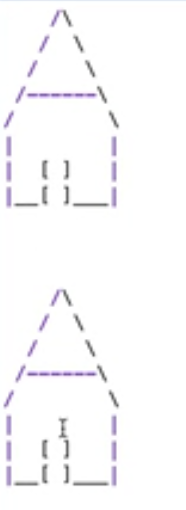
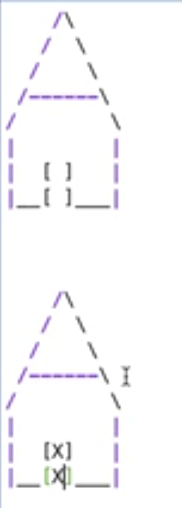

= original not affected by change in copy

<--> view: 

    one zooms in on one aspect of object (ex. door of house)

    if one changes the object in that view (ex. the door)
     
    one changes the original object (ex. the house of which door is part)

In [92]:
pokemon_df = pd.read_csv("pokemon.csv", usecols=["Pokemon"]) # begin with dataframe
pokemon_df

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
804,Stakataka
805,Blacephalon
806,Zeraora
807,Meltan


In [93]:
pokemon_series = pokemon_df.squeeze(axis = 1) # now squeeze it to get a series
pokemon_series

0        Bulbasaur
1          Ivysaur
2         Venusaur
3       Charmander
4       Charmeleon
          ...     
804      Stakataka
805    Blacephalon
806        Zeraora
807         Meltan
808       Melmetal
Name: Pokemon, Length: 809, dtype: object

In [94]:
# question: is pokemon a copy or a view?
# these seem 2 different variables
# but is that the case?

# let's assign new value in Series

pokemon_series[0] = "Whatever"
pokemon_series

0         Whatever
1          Ivysaur
2         Venusaur
3       Charmander
4       Charmeleon
          ...     
804      Stakataka
805    Blacephalon
806        Zeraora
807         Meltan
808       Melmetal
Name: Pokemon, Length: 809, dtype: object

In [95]:
pokemon_df # when we now also print out the dataframe
# we see that the dataframe has changed!

,Pokemon
0,Whatever
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
804,Stakataka
805,Blacephalon
806,Zeraora
807,Meltan


In [96]:
# so: Series object is in fact smaller part (like door of house) of
# larger Dataframe object (house): it is a view

# to avoid this, we can use the .copy() method:

pokemon_df2 = pd.read_csv("pokemon.csv", usecols=["Pokemon"]) # begin with dataframe
pokemon_df2

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
804,Stakataka
805,Blacephalon
806,Zeraora
807,Meltan


In [97]:
pokemon_series_2 = pokemon_df2.squeeze(axis = 1).copy() # now squeeze it again to get a series as a view from df
pokemon_series_2 # BUT ADD .COPY() method at the end to take a copy of the Series view, and have a separate object

0        Bulbasaur
1          Ivysaur
2         Venusaur
3       Charmander
4       Charmeleon
          ...     
804      Stakataka
805    Blacephalon
806        Zeraora
807         Meltan
808       Melmetal
Name: Pokemon, Length: 809, dtype: object

In [98]:
# change value in Series

pokemon_series_2[0] = "Whatever"
pokemon_series_2

0         Whatever
1          Ivysaur
2         Venusaur
3       Charmander
4       Charmeleon
          ...     
804      Stakataka
805    Blacephalon
806        Zeraora
807         Meltan
808       Melmetal
Name: Pokemon, Length: 809, dtype: object

In [99]:
# check values Dataframe
pokemon_df2 # Dataframe has remained unchanged: Series is indeed a copy in this case
# to avoid these confusing side changes, use .copy() method

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
804,Stakataka
805,Blacephalon
806,Zeraora
807,Meltan


## 17. Math Methods on Series Objects

- The `count` method returns the number of values in the Series. It excludes missing values; the `size` attribute includes missing values.
- The `sum` method adds together Series values.
- The `product` method multiplies together the Series values.
- The `mean` method calculates the average of the Series values.
- The `std` method calculates the standard deviation of the Series values.
- The `max` method returns the largest value in the Series.
- The `min` method returns the smallest value in the Series.
- The `median` method returns the median of the Series (the value in the middle).
- The `mode` method returns the mode of the Series (the most frequent value).
- The `describe` method returns a summary with various mathematical calculations.


In [100]:
# import dataset

google = pd.read_csv("google_stock_price.csv", usecols=["Close"]).squeeze(axis = 1)
google.head()

0    49.98
1    53.95
2    54.50
3    52.24
4    52.80
Name: Close, dtype: float64

In [101]:
google.count() # does NOT include missing values

3824

In [102]:
google.size # this DOES include missing values

3824

In [103]:
google.count()
google.sum()
google.product()
google.mean()
google.std()
google.max()
google.min()
google.median()

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


314.68

In [104]:
google.mode() # if you get back multiple answers: these numbers occur equally as much (= tie)

0    194.27
1    237.04
2    287.68
3    288.92
4    290.41
5    307.10
Name: Close, dtype: float64

In [105]:
google.describe() # summarizes several statistics

count    3824.000000
mean      479.945860
std       328.528592
min        49.820000
25%       235.860000
50%       314.680000
75%       708.205000
max      1287.580000
Name: Close, dtype: float64

## 18. Broadcasting

- **Broadcasting** describes the process of applying an arithmetic operation `+`, `-`, `*`, `/` ***to every element*** in a Series.
- There are also methods to accomplish the same results: `.add()`, `.sub()`, `.mul()`, `.div()`.


In [106]:
# import dataset

google = pd.read_csv("google_stock_price.csv", usecols=["Close"]).squeeze(axis = 1)
google.head()

0    49.98
1    53.95
2    54.50
3    52.24
4    52.80
Name: Close, dtype: float64

In [107]:
google.add(10)

0         59.98
1         63.95
2         64.50
3         62.24
4         62.80
         ...   
3819    1256.15
3820    1252.80
3821    1269.13
3822    1270.99
3823    1275.13
Name: Close, Length: 3824, dtype: float64

In [108]:
google + 10 # different from list: not added to end of list, but applied to every element

0         59.98
1         63.95
2         64.50
3         62.24
4         62.80
         ...   
3819    1256.15
3820    1252.80
3821    1269.13
3822    1270.99
3823    1275.13
Name: Close, Length: 3824, dtype: float64

## 19. The `value_counts` Method

- The `value_counts` method returns the number of times ***each unique value*** occurs in the Series.
- The `normalize` parameter returns the relative frequencies/percentages of the values instead of the counts.


In [109]:
pokemon_label = pd.read_csv("pokemon.csv", index_col = "Pokemon").squeeze(axis = 1)
pokemon_label

Pokemon
Bulbasaur      Grass / Poison
Ivysaur        Grass / Poison
Venusaur       Grass / Poison
Charmander               Fire
Charmeleon               Fire
                    ...      
Stakataka        Rock / Steel
Blacephalon      Fire / Ghost
Zeraora              Electric
Meltan                  Steel
Melmetal                Steel
Name: Type, Length: 809, dtype: object

In [110]:
pokemon_label.value_counts() #again: push tab to find parameters 

Type
Normal                65
Water                 61
Grass                 38
Psychic               35
Fire                  30
                      ..
Fire / Psychic         1
Normal / Ground        1
Psychic / Fighting     1
Dark / Ghost           1
Fire / Ghost           1
Name: count, Length: 159, dtype: int64

In [111]:
pokemon_label.value_counts(normalize=True) # one of these is normalize, to get relative frequencies

Type
Normal                0.080346
Water                 0.075402
Grass                 0.046972
Psychic               0.043263
Fire                  0.037083
                        ...   
Fire / Psychic        0.001236
Normal / Ground       0.001236
Psychic / Fighting    0.001236
Dark / Ghost          0.001236
Fire / Ghost          0.001236
Name: proportion, Length: 159, dtype: float64

In [112]:
pokemon_label.value_counts(normalize=True)*100 # to get percentages, we can use broadcoasting

Type
Normal                8.034611
Water                 7.540173
Grass                 4.697157
Psychic               4.326329
Fire                  3.708282
                        ...   
Fire / Psychic        0.123609
Normal / Ground       0.123609
Psychic / Fighting    0.123609
Dark / Ghost          0.123609
Fire / Ghost          0.123609
Name: proportion, Length: 159, dtype: float64

## 20. The `apply` Method

- The `apply` is a method that accepts *another function* as its argument.
- It then invokes that function *on every element* of a Series.


In [113]:
pokemon = pd.read_csv("pokemon.csv", usecols=["Pokemon"]).squeeze(axis = 1)
pokemon.head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Pokemon, dtype: object

In [114]:
pokemon.apply(len) # we pass in the function, we do not call it, so no round brackets

0       9
1       7
2       8
3      10
4      10
       ..
804     9
805    11
806     7
807     6
808     8
Name: Pokemon, Length: 809, dtype: int64

In [115]:
# you can of course also pass in your own functions

def count_of_a(pokemon):
    return pokemon.count("a")

pokemon.apply(count_of_a)

0      2
1      1
2      1
3      2
4      1
      ..
804    4
805    2
806    2
807    1
808    1
Name: Pokemon, Length: 809, dtype: int64

In [116]:
# remark:
# probably there will exist more efficient functions than apply() to get the results you look for
# but in case you do not know that these exist apply() offers a nice escape route


## 21. The `map` Method

- The `map` method "maps" or connects each Series value to another value.
- We can pass the method a dictionary or a **Series**. Both types connect keys to values.
- The `map` method uses our argument to connect or bridge together the values.


In [117]:
pokemon_label = pd.read_csv("pokemon.csv", index_col = "Pokemon").squeeze(axis = 1)
pokemon_label_cleaned

NameError: name 'pokemon_label_cleaned' is not defined

In [118]:
# we have 2 datasets:
# 1) Series pokemons
# 2) dictionary attack powers
# What we want to do is link each attack power to the Pokemon it belongs to
# via the common Type element

attack_powers = {
    "Grass" : 10,
    "Fire" : 15,
    "Water" : 15,
    "Fairy, Fighting" : 20,
    "Grass, Psychic" : 50
}

In [119]:
pokemon_label.map(attack_powers) # map method expects an input that will allow it to connect the values
# of the object it is called on to the keys of the input object; if it does not match: NaN

Pokemon
Bulbasaur       NaN
Ivysaur         NaN
Venusaur        NaN
Charmander     15.0
Charmeleon     15.0
               ... 
Stakataka       NaN
Blacephalon     NaN
Zeraora         NaN
Meltan          NaN
Melmetal        NaN
Name: Type, Length: 809, dtype: float64

In [120]:
# 15.0 as floating point? From the moment a column has 1 NaN, integers of not-NaN are rendered as floats

In [121]:
# we can also use map function on 2 Series

attack_powers = pd.Series({
    "Grass" : 10,
    "Fire" : 15,
    "Water" : 15,
    "Fairy, Fighting" : 20,
    "Grass, Psychic" : 50
})

attack_powers

Grass              10
Fire               15
Water              15
Fairy, Fighting    20
Grass, Psychic     50
dtype: int64

In [122]:
pokemon_label.map(attack_powers)

Pokemon
Bulbasaur       NaN
Ivysaur         NaN
Venusaur        NaN
Charmander     15.0
Charmeleon     15.0
               ... 
Stakataka       NaN
Blacephalon     NaN
Zeraora         NaN
Meltan          NaN
Melmetal        NaN
Name: Type, Length: 809, dtype: float64